# Alzheimer's Disease prediction

The dataset has been obtained out of the ADNI (Alzheimer's Disease Neuroimaging Initiative) datasets. 
During the course of Alzheimer's disease, people that are first cognitively normal (Label : CN) start having mild cognitive impairments (Label : MCI) before the conversion to Alzheimer's disease (Label : AD).

The dataset is said to be "longitudinal" because patient there are multiple visits per patients which results in multiple rows per patients.

### Columns : 

- "DXCHANGE" : diagnosis of the patient at the corresponding visits. 1 corresponds to  CN, 2 is MCI and 3 is AD.
- "RID" and "PTID" correspond to two different identification number for each patient. As some patients have been seen multiple times, there are represented by multiple lines in the dataset
- "VISCODE" corresponds to the visit number. The first one is "bl" (standing for _baseline_) while the other are encoded as "m#" where "#" is an number that corresponds to the number of month after the baseline. For instance, "m36" means that the visit occured 36 months after the baseline.
- "EXAMDATE" corresponds to the date at the examination.
- "AGE" corresponds to the age AT BASELINE. The age at any visit can be computed from the AGE at baseline and EXAMDATEs
- Some cofactors : 'PTGENDER' -> the gender, 'PTEDUCAT'-> Number of education in years, 'PTMARRY' -> Marital status. 'APOE' -> number of the APOE-epsilon4 genetic mutations which is related to Alzheimer's disease.
- Some cognitive tests : 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA'.
- Some imaging variables : 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV' where 'ICV' is the total brain volume.
- Radioactive tracers : 'FDG', 'PIB', 'AV45'

The previous columns are predominantly used by the community. There are way more columns in the dataset that you are free to investigate.

NB: There are missing values.


### Tasks

This notebook offers different tasks to tackle - it is not required to do them all, nor to do them in order. It is simply intended to check your abilities in different settings, from conventional Machine Learning to developping your own ideas. It is clearly prefered to have one task well completed rather than exploring different without significant conclusions.

### Remarks

While exploring and experimenting, you might need to dig into the data. If so, do not hesitate to let your experiments and comment them for the sake of clarity, so that we better understand what you are doing and how you are doing it.


### Evaluation

There are no rigid evaluation of your work, but we will inevitably look at :
- your performance on the different tasks, how you obtained your best performance and potentially the comparison between different techniques
- the consistency and correctness of the method and evaluation techniques you use
- your coding experience
- your ability to explain what you are doing
- the conclusions you draw from the different tasks
- your ability to explore and propose your own ideas.


### Minor comments 

We prefer library as pandas, numpy and scikit-learn to start with as they provide numerous functions and tools to do the job, but you are free to use other Python package.

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

Let's begin by importing the dataset and removing useless columns.

In [2]:
df = pd.read_csv("data_small.csv")
df.head()

C:\Users\Geoffrey\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47,48,473,475,476,489,490,491,492,493,494,495,496,497,498,499,500,501) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,...,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST102TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,0,0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,...,2.332,0.738,2443,652,3.19,0.833,3466,1303,2.462,0.61
1,1,1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,...,2.121,0.645,1881,697,2.214,0.857,3463,1350,2.295,0.648
2,2,2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,...,2.028,0.58,1994,756,2.177,0.859,3411,1263,2.37,0.598
3,3,3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,...,2.011,0.627,1776,712,2.046,0.796,3368,1321,2.317,0.635
4,4,4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,...,2.144,0.676,1701,675,2.015,0.835,3566,1344,2.33,0.676


In [3]:
df = df.drop(df.columns[[0, 1]], axis=1)
df.head()

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,ST102TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST102TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST103TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104CV_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104SA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TA_UCSFFSX_11_02_15_UCSFFSX51_08_01_16,ST104TS_UCSFFSX_11_02_15_UCSFFSX51_08_01_16
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,2.332,0.738,2443,652,3.19,0.833,3466,1303,2.462,0.61
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,2.121,0.645,1881,697,2.214,0.857,3463,1350,2.295,0.648
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,2.028,0.58,1994,756,2.177,0.859,3411,1263,2.37,0.598
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,2.011,0.627,1776,712,2.046,0.796,3368,1321,2.317,0.635
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,2.144,0.676,1701,675,2.015,0.835,3566,1344,2.33,0.676


# Data analysis

We will start by analyzing the most commonly used variables enumerated in the second paragraph of this notebook.

In [4]:
cofactors = ['PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4']
cognitive_tests = ['CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
                   'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA']
imaging_vars = ['Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal',
                'Fusiform', 'MidTemp', 'ICV']
radio_tracers = ['FDG', 'PIB', 'AV45']

selected_vars = ['DXCHANGE', 'AGE'] + cofactors + cognitive_tests + imaging_vars + radio_tracers

In [5]:
df_bl = df[selected_vars]
df_bl = df_bl[df.VISCODE == 'bl']

In [6]:
### Proportion of each diagnosis
print("CN :", len(df_bl[df_bl.DXCHANGE == 1])/len(df_bl))
print("MCI :", len(df_bl[df_bl.DXCHANGE == 2])/len(df_bl))
print("AD :", len(df_bl[df_bl.DXCHANGE == 3])/len(df_bl))

CN : 0.3027309703660662
MCI : 0.5020337013364323
AD : 0.19523532829750145


At first, let's look at the cofactors variables.

In [7]:
### Cofactors analysis
for col in cofactors :
    print(df_bl[col].value_counts())
    print()

16    407
18    303
20    233
12    218
14    191
17     82
13     79
19     77
15     64
10     21
11     16
8      12
9       7
7       6
6       3
4       2
Name: PTEDUCAT, dtype: int64

Not Hisp/Latino    1654
Hisp/Latino          56
Unknown              11
Name: PTETHCAT, dtype: int64

White                1591
Black                  77
Asian                  29
More than one          16
Am Indian/Alaskan       3
Unknown                 3
Hawaiian/Other PI       2
Name: PTRACCAT, dtype: int64

Married          1299
Widowed           205
Divorced          148
Never married      62
Unknown             7
Name: PTMARRY, dtype: int64

0.0    911
1.0    633
2.0    171
Name: APOE4, dtype: int64



PTETHCAT and PTRACCAT don't seem to be relevant variables since almost all patients are non-hispanic white people. Let's also regroup the lowest values of PTEDUCAT into one category.

In [8]:
df_bl = df_bl.drop(['PTETHCAT', 'PTRACCAT'], axis=1)
df_bl['PTEDUCAT'] = df_bl['PTEDUCAT'].apply(lambda x: 11 if x<12 else x)

# There are more married people than non-married people in the dataset.
# To balance the different classes, marital status is also replaced by a binary variable (1 for married / 0 for others).
# Moreover, the distribution of DXCHANGE values for widowed, divorced and never married seem quite similar.
df_bl['PTMARRY'] = df_bl['PTMARRY'].replace(to_replace=['Divorced','Married', 'Never married', 'Widowed'], value=[0,1,0,0])

# There are few people with an unknown marital status so they can be removed from the dataset
df_bl = df_bl[df_bl.PTMARRY != 'Unknown']

PTMARRY  DXCHANGE
0        2.0         0.465060
         1.0         0.402410
         3.0         0.132530
1        2.0         0.511932
         1.0         0.271747
         3.0         0.216320
Name: DXCHANGE, dtype: float64


C:\Users\Geoffrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Geoffrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Geoffrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


([array([0.02350427, 0.09615385, 0.04700855, 0.11965812, 0.0534188 ,
         0.25641026, 0.05769231, 0.21581197, 0.0534188 , 0.18803419]),
  array([0.04273504, 0.14504015, 0.05309505, 0.12302512, 0.03367003,
         0.25641026, 0.05439005, 0.2033152 , 0.05309505, 0.14633515]),
  array([0.0760582 , 0.19510582, 0.05291005, 0.12896825, 0.03968254,
         0.29100529, 0.04298942, 0.14880952, 0.03306878, 0.10251323])],
 array([11. , 11.9, 12.8, 13.7, 14.6, 15.5, 16.4, 17.3, 18.2, 19.1, 20. ]),
 <a list of 3 Lists of Patches objects>)

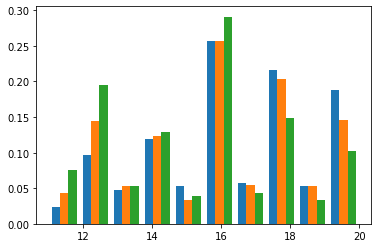

In [9]:
print(df_bl.groupby(['PTMARRY'])['DXCHANGE'].value_counts(normalize=True))

lab1 = df_bl[df.DXCHANGE == 1]['PTEDUCAT'].to_numpy()
lab2 = df_bl[df.DXCHANGE == 2]['PTEDUCAT'].to_numpy()
lab3 = df_bl[df.DXCHANGE == 3]['PTEDUCAT'].to_numpy()
plt.hist((lab1,lab2,lab3),10, label = ('CN','MCI','AD'), density = True)
# Blue is CN / Orange is MCI / Green is AD

We can see significative differences in diagnosis depending on marital status ot level of education.

We will now analyse the data of the results of the cognitive tests.

count    1714.000000
mean        1.643816
std         1.798731
min         0.000000
25%         0.000000
50%         1.000000
75%         2.500000
max        10.000000
Name: CDRSB, dtype: float64


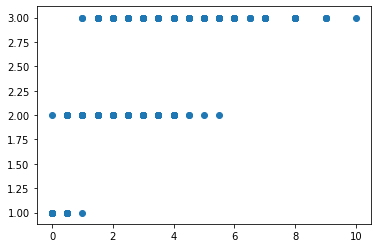


count    1711.000000
mean       10.781222
std         6.662858
min         0.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        42.670000
Name: ADAS11, dtype: float64


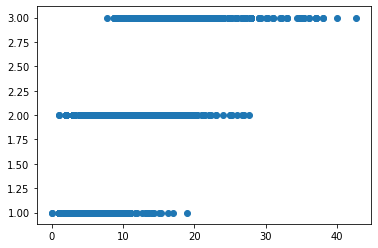


count    1702.000000
mean       16.907556
std         9.586452
min         0.000000
25%         9.330000
50%        15.000000
75%        23.000000
max        54.670000
Name: ADAS13, dtype: float64


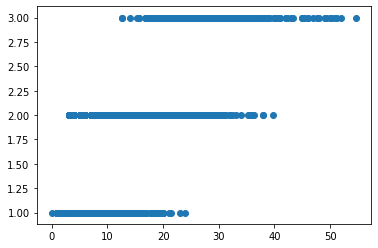


count    1714.000000
mean       27.166278
std         2.671072
min        18.000000
25%        26.000000
50%        28.000000
75%        29.000000
max        30.000000
Name: MMSE, dtype: float64


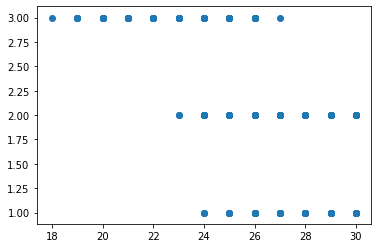


count    1709.000000
mean       35.161498
std        12.436053
min         0.000000
25%        26.000000
50%        34.000000
75%        44.000000
max        71.000000
Name: RAVLT_immediate, dtype: float64


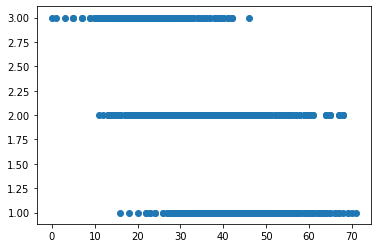


count    1709.000000
mean        4.174956
std         2.733765
min        -4.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        12.000000
Name: RAVLT_learning, dtype: float64


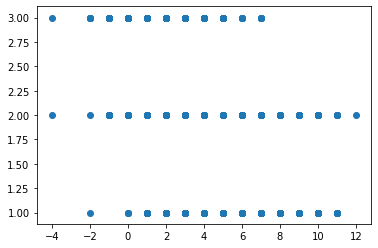


count    1709.000000
mean        4.332943
std         2.447045
min        -5.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        15.000000
Name: RAVLT_forgetting, dtype: float64


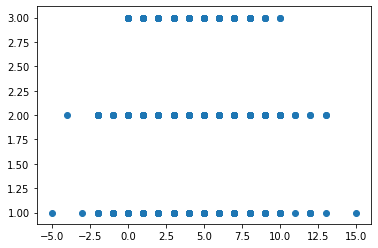


count    1704.000000
mean       58.602082
std        34.470912
min      -100.000000
25%        30.000000
50%        60.000000
75%       100.000000
max       100.000000
Name: RAVLT_perc_forgetting, dtype: float64


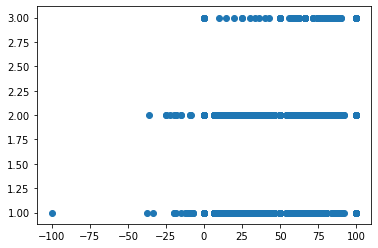


count    1709.000000
mean        4.262727
std         6.288490
min         0.000000
25%         0.000000
50%         1.000000
75%         6.000000
max        30.000000
Name: FAQ, dtype: float64


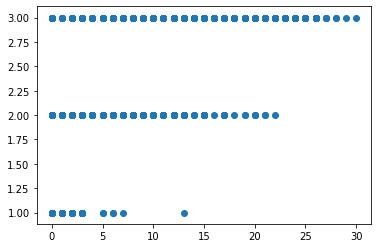


count    890.000000
mean      23.158427
std        4.278634
min        4.000000
25%       21.000000
50%       24.000000
75%       26.000000
max       30.000000
Name: MOCA, dtype: float64


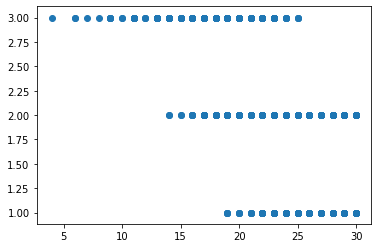

In [10]:
### Cognitive tests
for col in cognitive_tests :
    print(df_bl[col].describe())
    plt.scatter(df_bl[col], df_bl.DXCHANGE)
    plt.show()
    print()

The datas are not linearly separable for all of the tests but we can see that with a simple rule (MOCA < 7, for example), an accurate diagnosis can be achieved. Since we have many different tests results in the dataset, a CN vs AD classification should be relatively easy. If we plot two variables against each other, this is even more obvious.

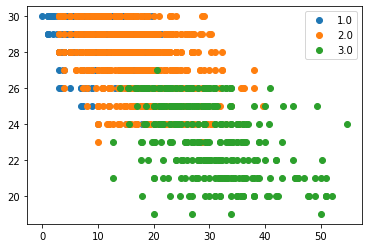

In [11]:
test = df_bl.groupby('DXCHANGE')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in test :
    ax.plot(group.ADAS13, group.MMSE, marker='o', linestyle='', ms=6, label=name)
ax.legend()

plt.show()

count      1635.000000
mean      40297.962080
std       22640.615098
min        5650.000000
25%       23850.500000
50%       35363.000000
75%       51496.000000
max      145115.000000
Name: Ventricles, dtype: float64


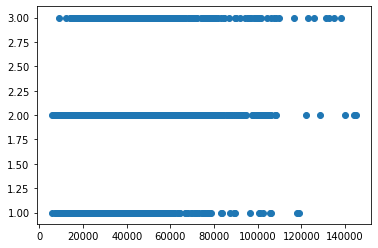


count     1473.000000
mean      6783.573659
std       1185.270121
min       2991.000000
25%       5945.000000
50%       6852.000000
75%       7640.000000
max      10769.000000
Name: Hippocampus, dtype: float64


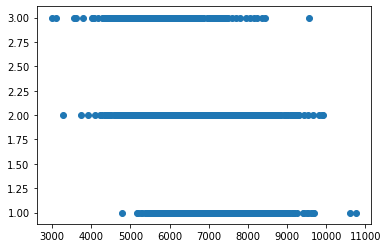


count    1.669000e+03
mean     1.020335e+06
std      1.114006e+05
min      6.693640e+05
25%      9.396240e+05
50%      1.014910e+06
75%      1.094310e+06
max      1.486040e+06
Name: WholeBrain, dtype: float64


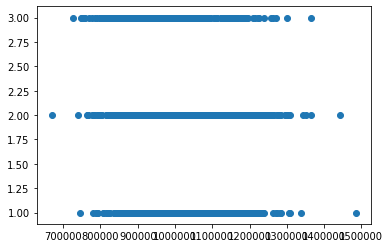


count    1450.000000
mean     3485.246897
std       779.766678
min      1426.000000
25%      2951.000000
50%      3508.000000
75%      4037.500000
max      5896.000000
Name: Entorhinal, dtype: float64


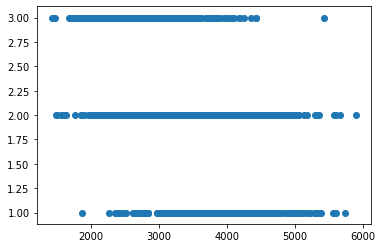


count     1450.000000
mean     17293.253103
std       2753.382670
min       8991.000000
25%      15430.000000
50%      17259.000000
75%      19076.500000
max      29950.000000
Name: Fusiform, dtype: float64


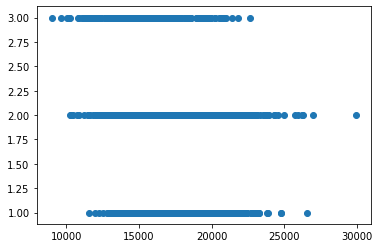


count     1450.000000
mean     19441.013103
std       3090.770336
min       9375.000000
25%      17459.750000
50%      19415.500000
75%      21511.250000
max      32189.000000
Name: MidTemp, dtype: float64


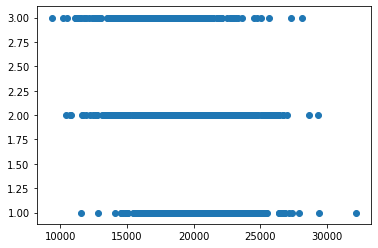


count    1.701000e+03
mean     1.531047e+06
std      1.666342e+05
min      1.100690e+06
25%      1.411180e+06
50%      1.516900e+06
75%      1.637980e+06
max      2.110290e+06
Name: ICV, dtype: float64


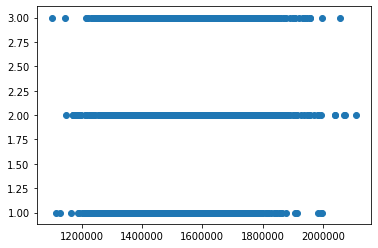

In [12]:
### Imaging variables
for col in imaging_vars :
    print(df_bl[col].describe())
    plt.scatter(df_bl[col], df_bl.DXCHANGE)
    plt.show()
    print()

Unfortunately, most of the imaging variables don't seem very useful for a classification task but since we don't lack of computing power, we can still keep them in the dataset.

count    1290.000000
mean        1.233333
std         0.154542
min         0.697264
25%         1.140130
50%         1.244020
75%         1.336593
max         1.707170
Name: FDG, dtype: float64


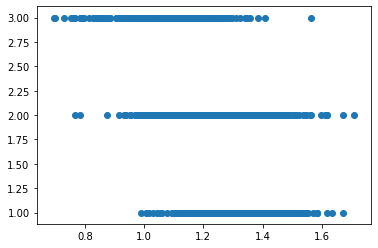


count    20.000000
mean      1.698375
std       0.372302
min       1.155000
25%       1.361875
50%       1.743750
75%       1.956250
max       2.282500
Name: PIB, dtype: float64


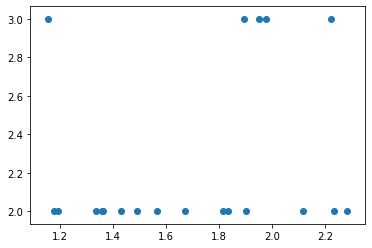


count    883.000000
mean       1.212668
std        0.227201
min        0.838537
25%        1.020925
50%        1.138380
75%        1.390540
max        2.025560
Name: AV45, dtype: float64


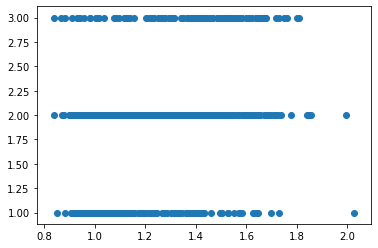

In [13]:
### Radio tracers analysis
for col in radio_tracers :
    print(df_bl[col].describe())
    plt.scatter(df_bl[col], df_bl.DXCHANGE)
    plt.show()
    print()

Only 200 patients (out of 1714) have a PIB value so this variable should be removed from the dataset.

In [14]:
df_bl = df_bl.drop(['PIB'], axis=1)

In [15]:
def clean_df(df) :
    df = df.drop(['PTETHCAT', 'PTRACCAT'], axis=1)
    df['PTEDUCAT'] = df['PTEDUCAT'].apply(lambda x: 11 if x<12 else x)
    df['PTMARRY'] = df['PTMARRY'].replace(to_replace=['Divorced','Married', 'Never married', 'Widowed'], value=[0,1,0,0])
    df = df[df.PTMARRY != 'Unknown']
    df = df.drop(['PIB'], axis=1)
    return df

# Part 1: Alzheimer's Disease (AD) Versus Cognitively  Normal (CN) at baseline

The first task of this notebook consists in keeping only the first visit of each patient ("VISCODE" == "bl") and keeping only cognitively normal patient and patient with Alzheimer's disease ("DXCHANGE" == 1 and "DXCHANGE" == 3).

From this subset of the initial dataset, the goal is to diagnose the patient status (1 or 3) given the other variables (you are free to choose the one you want).

In [16]:
df1 = df_bl[df_bl.DXCHANGE != 2]
df1.head()

,DXCHANGE,AGE,PTEDUCAT,PTMARRY,APOE4,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,...,MOCA,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,FDG,AV45
0,1.0,74.3,16,1,0.0,0.0,10.67,18.67,28.0,44.0,...,NaN,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,1.36926,NaN
1,3.0,81.3,18,1,1.0,4.5,22.00,31.00,20.0,22.0,...,NaN,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,1.09079,NaN
10,1.0,73.7,16,1,0.0,0.0,8.67,14.67,29.0,37.0,...,NaN,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,1640770.0,1.29799,NaN
20,3.0,75.4,11,1,1.0,6.0,27.33,40.33,20.0,17.0,...,NaN,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,1353520.0,NaN,NaN
22,1.0,84.5,18,0,0.0,0.0,5.00,7.00,28.0,51.0,...,NaN,18757.0,6080.0,948684.0,4190.0,14043.0,20076.0,1396070.0,1.27628,NaN


Several values are missing for many variables so they will be replaced by the mean of the respective variables.

In [17]:
df1 = df1.fillna(df1.mean())

In [18]:
### Proportion of each diagnosis
print("CN :", len(df1[df1.DXCHANGE == 1])/len(df1))
print("AD :", len(df1[df1.DXCHANGE == 3])/len(df1))

CN : 0.6074766355140186
AD : 0.3925233644859813


In order to build our classifier, we will use the popular SVM algorithm. The results of the model will be evaluated by its accuracy and its confusion matrix. The accuracy will then be compared to the above diagnosis distribution in order to compare the model to a random prediction.

The hyper-parameters will also be optimized with the GridSearch fonction.

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [20]:
### Prepare datas for the model
X = df1.drop(['DXCHANGE'], axis=1)
X = sk.preprocessing.StandardScaler().fit(X).transform(X)
Y = df1['DXCHANGE'].values

In [21]:
### Split datas between train, cross-validation and test sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [22]:
### SVM model

# Train model
SVM = svm.SVC()
param_grid_SVM = [{'C': [0.01, 0.1, 0.3, 1, 10], 'gamma': [0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}]

# Search the best parameters
gridSVM=GridSearchCV(SVM, param_grid=param_grid_SVM, cv=5)
gridSVM.fit(X_train,y_train)
print('Accuracy on training set:', gridSVM.best_score_)
SVM_params = gridSVM.best_params_
print('Best parameters :', gridSVM.best_params_, "\n")

# Train model with best parameters
SVM = svm.SVC(C = SVM_params['C'], gamma = SVM_params['gamma'], kernel = SVM_params['kernel'])
SVM.fit(X_train, y_train)
yhat_SVM = SVM.predict(X_test)
print('Accuracy on test set:', SVM.score(X_test, y_test))
print (classification_report(y_test, yhat_SVM))

Accuracy on training set: 1.0
Best parameters : {'C': 0.3, 'gamma': 0.001, 'kernel': 'linear'} 

Accuracy on test set: 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       103
         3.0       1.00      1.00      1.00        69

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



The model achieves 100% sucess rate on the test set. This is a perfect score so there is nothing more to say...

# Part 2: AD versus CN versus MCI at baseline

The second task of the notebook is similar to the first one except that you add the intermediate status: subjects with Mild Cognitive Impairements (MCI). This is still a diagnosis exercise where you predict the "DXCHANGE" status from the other variables.

In [23]:
df2 = df_bl.copy(deep = True)
df2 = df2.fillna(df2.mean())

In [24]:
### Proportion of each diagnosis
print("CN :", len(df2[df2.DXCHANGE == 1])/len(df2))
print("MCI :", len(df2[df2.DXCHANGE == 2])/len(df2))
print("AD :", len(df2[df2.DXCHANGE == 3])/len(df2))

CN : 0.3033838973162194
MCI : 0.5005834305717619
AD : 0.19603267211201866


In this part, the model has to classify patients into three different categories instead of two. According to the graphs in the analysis part of this notebook, the datas are less separable when MCI status is taken into account. Consequently, the model's accuracy should be lower.

We will start by evaluating the efficiency of the SVM model.

In [25]:
X = df2.drop(['DXCHANGE'], axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
Y = df2['DXCHANGE'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
X_train, X_cv, y_train, y_cv = train_test_split( X_train, y_train, test_size=0.2, random_state=4)

In [27]:
SVM = svm.SVC()
param_grid_SVM = [{'C': [0.01, 0.1, 0.3, 1, 10], 'gamma': [0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}]

gridSVM=GridSearchCV(SVM, param_grid=param_grid_SVM, cv=5)
gridSVM.fit(X_train,y_train)
print('Accuracy on training set :', gridSVM.best_score_)
SVM_params = gridSVM.best_params_
print('Best parameters :', gridSVM.best_params_, "\n")

# Train model with best parameters
SVM = svm.SVC(C = SVM_params['C'], gamma = SVM_params['gamma'], kernel = SVM_params['kernel'])
SVM.fit(X_train, y_train)
yhat_SVM = SVM.predict(X_test)
print("Accuracy on test set :", SVM.score(X_test, y_test))
print (classification_report(y_test, yhat_SVM))

Accuracy on training set : 0.9233706932337068
Best parameters : {'C': 10, 'gamma': 0.001, 'kernel': 'linear'} 

Accuracy on test set : 0.9329446064139941
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94        98
         2.0       0.92      0.95      0.93       172
         3.0       0.93      0.90      0.92        73

    accuracy                           0.93       343
   macro avg       0.94      0.93      0.93       343
weighted avg       0.93      0.93      0.93       343



The model achieved a 93,29% accuracy on the test set. We will try to do better with other models.

First, we saw that simple rules (MOCA < 7, for example) could predict perfectly the diagnosis of a patient. So, trying a model based on a decision tree could be a good idea. The algorithm below will, in a first time, find the best max depth for the tree then build a final model.

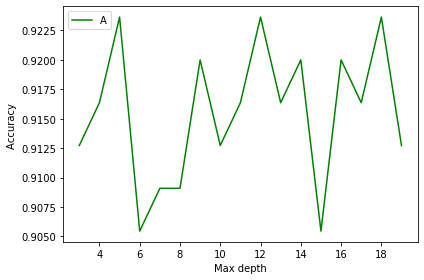

Decision Tree's accuracy on training set (with max depth = 5 ) : 0.9236363636363636 

Accuracy on test set :  0.9446064139941691
              precision    recall  f1-score   support

         1.0       1.00      0.92      0.96        98
         2.0       0.91      0.99      0.95       172
         3.0       0.97      0.88      0.92        73

    accuracy                           0.94       343
   macro avg       0.96      0.93      0.94       343
weighted avg       0.95      0.94      0.94       343



In [28]:
# Train model
from sklearn.tree import DecisionTreeClassifier
K = 20
accuracy = np.zeros((K-3))

for depth in range(3,K) :
    # Train model
    LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    LoanTree.fit(X_train,y_train)
    
    # Predict
    yhat_Tree = LoanTree.predict(X_cv)
    accuracy[depth-3] = metrics.accuracy_score(y_cv, yhat_Tree)

# Display results
plt.plot(range(3,K),accuracy,'g')
plt.legend('Accuracy')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth')
plt.tight_layout()
plt.show()
print( "Decision Tree's accuracy on training set (with max depth =", accuracy.argmax()+3, ") :", accuracy.max(), "\n")

# Train model with the best max_depth
max_depth = accuracy.argmax()+1
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)
LoanTree.fit(X_train,y_train)
yhat_Tree = LoanTree.predict(X_test)
print("Accuracy on test set : ", LoanTree.score(X_test, y_test))
print (classification_report(y_test, yhat_Tree))

Once again, the accuracy is very high : 94,16%.

Since the algorithm is slightly better at classifying CN than AD, maybe a one vs all classifier would perform better. So an algorithm of that type based on a SVM algorithm will be implemented just below.

In [29]:
probs = np.zeros((len(y_test),3))
l = 0
for i,j in [[2,3],[1,3],[1,2]] :
    
    y_train_new = np.copy(y_train)
    for k in range(len(y_train_new)) :
        if y_train_new[k] == i or y_train_new[k] == j :
            y_train_new[k] = 4
    
    # Train model with best parameters
    SVM = svm.SVC(C = 10, gamma = 0.001, kernel = 'linear', probability=True)
    SVM.fit(X_train, y_train_new)
    probs[:,l] = SVM.predict_proba(X_test)[:,0]
    #print(SVM.predict(X_test)[0:5])
    #print(SVM.predict_proba(X_test)[0:5,:])
    l += 1
    #print (classification_report(y_test, yhat_SVM))
    
pred = np.argmax(probs, axis = 1)
accuracy = np.sum(pred == (y_test-1))/len(pred)
print("Accuracy on test set :", accuracy)

Accuracy on test set : 0.9358600583090378


The accuracy is similar to the SVM algorithm.

Since machine learning classifiers doesn't seem to be able to achieve a better accuracy, we will try a deep learning algorithm : a neural network. In order to find the best architecture, xe will test several values for the regularization parameter alpha, the number of neurons in each layer and the number of layers.

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
for alpha in [1, 0.3, 0.1, 0.01] :
    for ls in [4, 8, 12] :
        # 2 layers
        clf = MLPClassifier(hidden_layer_sizes=(ls,ls), activation='tanh', solver='adam',
                            alpha=alpha, random_state=1, max_iter = 1000)
        clf.fit(X_train, y_train)
        print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))
        
        # 3 layers
        clf = MLPClassifier(hidden_layer_sizes=(ls,ls,ls), activation='tanh', solver='adam',
                            alpha=alpha, random_state=1, max_iter = 1000)
        clf.fit(X_train, y_train)
        print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))
        
        # 4 layers
        clf = MLPClassifier(hidden_layer_sizes=(ls,ls,ls,ls), activation='tanh', solver='adam',
                            alpha=alpha, random_state=1, max_iter = 800)
        clf.fit(X_train, y_train)
        print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ", ", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))

alpha =  1   ls = ( 4 ,  4 )  :   0.9381818181818182
alpha =  1   ls = ( 4 ,  4 ,  4 )  :   0.92
alpha =  1   ls = ( 4 ,  4 ,  4 ,  4 )  :   0.92
alpha =  1   ls = ( 8 ,  8 )  :   0.9272727272727272
alpha =  1   ls = ( 8 ,  8 ,  8 )  :   0.8872727272727273
alpha =  1   ls = ( 8 ,  8 ,  8 ,  8 )  :   0.8945454545454545
alpha =  1   ls = ( 12 ,  12 )  :   0.9236363636363636
alpha =  1   ls = ( 12 ,  12 ,  12 )  :   0.9090909090909091
alpha =  1   ls = ( 12 ,  12 ,  12 ,  12 )  :   0.8909090909090909
alpha =  0.3   ls = ( 4 ,  4 )  :   0.9381818181818182
alpha =  0.3   ls = ( 4 ,  4 ,  4 )  :   0.92
alpha =  0.3   ls = ( 4 ,  4 ,  4 ,  4 )  :   0.92
alpha =  0.3   ls = ( 8 ,  8 )  :   0.8872727272727273
alpha =  0.3   ls = ( 8 ,  8 ,  8 )  :   0.88
alpha =  0.3   ls = ( 8 ,  8 ,  8 ,  8 )  :   0.8872727272727273
alpha =  0.3   ls = ( 12 ,  12 )  :   0.9018181818181819
alpha =  0.3   ls = ( 12 ,  12 ,  12 )  :   0.8945454545454545


C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  0.3   ls = ( 12 ,  12 ,  12 ,  12 )  :   0.8545454545454545
alpha =  0.1   ls = ( 4 ,  4 )  :   0.9163636363636364
alpha =  0.1   ls = ( 4 ,  4 ,  4 )  :   0.9163636363636364
alpha =  0.1   ls = ( 4 ,  4 ,  4 ,  4 )  :   0.9127272727272727


C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  0.1   ls = ( 8 ,  8 )  :   0.8727272727272727
alpha =  0.1   ls = ( 8 ,  8 ,  8 )  :   0.8763636363636363
alpha =  0.1   ls = ( 8 ,  8 ,  8 ,  8 )  :   0.88
alpha =  0.1   ls = ( 12 ,  12 )  :   0.8836363636363637
alpha =  0.1   ls = ( 12 ,  12 ,  12 )  :   0.8727272727272727
alpha =  0.1   ls = ( 12 ,  12 ,  12 ,  12 )  :   0.8763636363636363
alpha =  0.01   ls = ( 4 ,  4 )  :   0.9163636363636364
alpha =  0.01   ls = ( 4 ,  4 ,  4 )  :   0.92
alpha =  0.01   ls = ( 4 ,  4 ,  4 ,  4 )  :   0.9090909090909091


C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  0.01   ls = ( 8 ,  8 )  :   0.8690909090909091
alpha =  0.01   ls = ( 8 ,  8 ,  8 )  :   0.8690909090909091
alpha =  0.01   ls = ( 8 ,  8 ,  8 ,  8 )  :   0.88
alpha =  0.01   ls = ( 12 ,  12 )  :   0.88
alpha =  0.01   ls = ( 12 ,  12 ,  12 )  :   0.8690909090909091
alpha =  0.01   ls = ( 12 ,  12 ,  12 ,  12 )  :   0.8654545454545455


In [32]:
alpha = 1
ls = 4
clf = MLPClassifier(hidden_layer_sizes=(ls,ls), activation='tanh', solver='adam',
                            alpha=alpha, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Neural network")
print("alpha = ", alpha, "  layers = (", ls, ", ", ls, ")")
print("Accuracy on test set :", clf.score(X_test, y_test))

Neural network
alpha =  1   layers = ( 4 ,  4 )
Accuracy on test set : 0.9183673469387755


The experiments above show that a neural network with 2 hidden layers of 4 neurons has an accuracy of 91,8% on the test set which is little bit lower compared to the Decision tree and the SVM models.

# Part 3: AD versus CN versus MCI in 3 years

Here, the task is not to diagnose the status from the other value at the same visit, but to split the individual visits into past and future ones. You will use any variables from the past to predict the status (CN, AD or MCI) of the patients 3 years ahead of time.

Here, you should only consider one visit in the past and predict one status 3 years ahead.

NB: You can reprocude the experiments by choosing other temporal horizons such as 2, 4 or 5 years.

First, we need to create a new dataset where the DXCHANGE value of a patient at time t is replaced by its DXCHANGE three yers ahead.

In [33]:
def prepare_pred_df(init_df, date1, date2) :
    # Create a new dataset containing the patients still followed 3 years after date1
    m36 = init_df[init_df.VISCODE == date2]

    # Get their RID number
    rid = m36['RID'].to_numpy()

    # Select in the original dataset the patients that have been followed during 3 years from date1
    df = init_df[init_df.VISCODE == date1]
    rid = np.intersect1d(rid, df['RID'].to_numpy())
    df = df[df['RID'].isin(rid)]
    m36 = m36[m36['RID'].isin(rid)]

    # Use the RID as index for the two datasets
    df = df.set_index('RID')
    m36 = m36.set_index('RID')

    # Swap the DXCHANGE values
    df['DXCHANGE'] = m36['DXCHANGE'].to_numpy()
    
    df = df[selected_vars]
    
    return df

In [34]:
df3 = pd.concat([prepare_pred_df(df,'bl','m36'),
                prepare_pred_df(df,'m12','m48'),
                prepare_pred_df(df,'m24','m60'),
                prepare_pred_df(df,'m36','m72')
                ], axis = 0, sort = False)

In [35]:
print(df3.shape)
print(df3.DXCHANGE.value_counts())

(1680, 27)
2.0    766
1.0    613
3.0    301
Name: DXCHANGE, dtype: int64


Let's take a look at the graphs of the selected variables.

count    1664.000000
mean        1.084135
std         1.315119
min         0.000000
25%         0.000000
50%         0.500000
75%         1.500000
max        10.000000
Name: CDRSB, dtype: float64


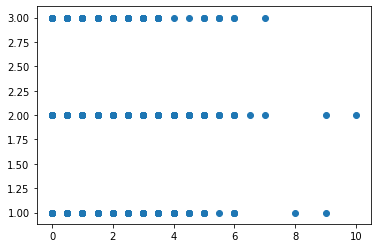


count    1678.000000
mean        8.178570
std         4.914939
min         0.000000
25%         4.670000
50%         7.000000
75%        11.000000
max        37.000000
Name: ADAS11, dtype: float64


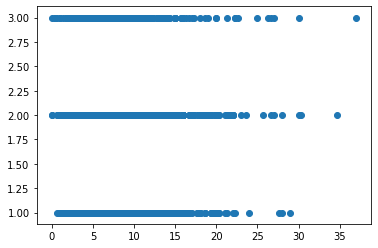


count    1666.000000
mean       13.074610
std         7.463176
min         0.330000
25%         7.330000
50%        12.000000
75%        17.670000
max        48.000000
Name: ADAS13, dtype: float64


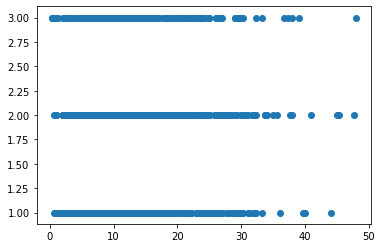


count    1680.000000
mean       28.061310
std         2.162638
min        12.000000
25%        27.000000
50%        29.000000
75%        30.000000
max        30.000000
Name: MMSE, dtype: float64


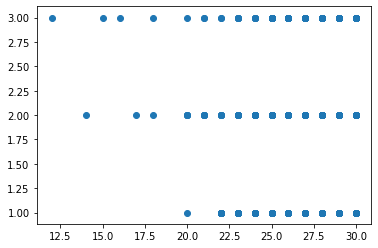


count    1677.000000
mean       38.683363
std        11.695798
min         7.000000
25%        30.000000
50%        38.000000
75%        47.000000
max        72.000000
Name: RAVLT_immediate, dtype: float64


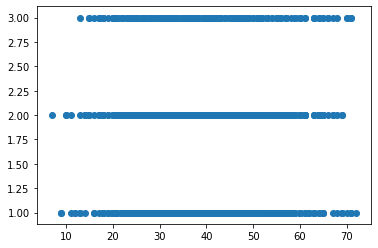


count    1677.000000
mean        4.876565
std         2.733755
min        -4.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: RAVLT_learning, dtype: float64


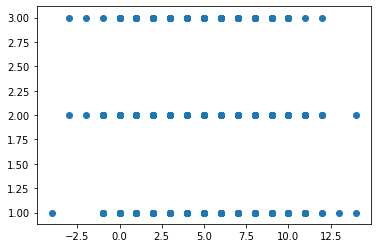


count    1674.000000
mean        4.183990
std         2.656386
min       -10.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        14.000000
Name: RAVLT_forgetting, dtype: float64


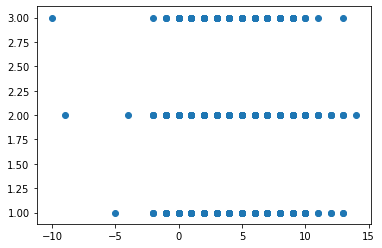


count    1672.000000
mean       49.534862
std        38.430800
min      -500.000000
25%        22.222200
50%        45.454500
75%        80.000000
max       100.000000
Name: RAVLT_perc_forgetting, dtype: float64


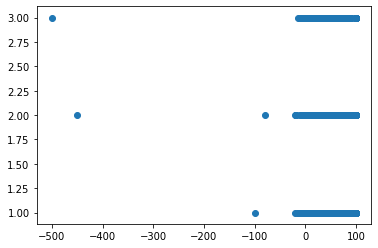


count    1672.000000
mean        2.547249
std         4.636665
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        27.000000
Name: FAQ, dtype: float64


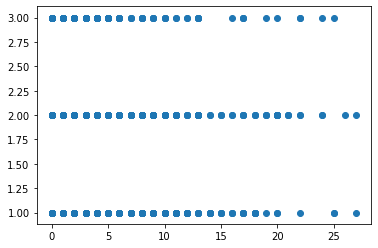


count    679.000000
mean      24.298969
std        3.153943
min        7.000000
25%       22.000000
50%       24.000000
75%       26.000000
max       30.000000
Name: MOCA, dtype: float64


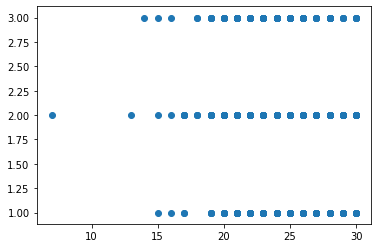

In [36]:
### Cognitive tests
for col in cognitive_tests :
    print(df3[col].describe())
    plt.scatter(df3[col], df3.DXCHANGE)
    plt.show()
    print()

count      1543.000000
mean      37865.967596
std       21495.921670
min        5650.000000
25%       22524.500000
50%       32847.000000
75%       47451.500000
max      146860.000000
Name: Ventricles, dtype: float64


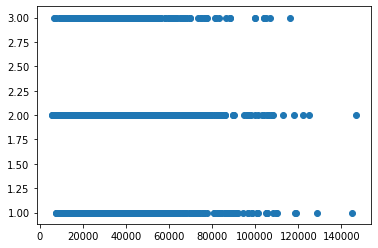


count     1371.000000
mean      7012.727936
std       1136.070673
min       2961.000000
25%       6244.000000
50%       7084.000000
75%       7773.500000
max      11041.000000
Name: Hippocampus, dtype: float64


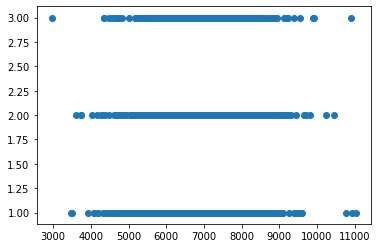


count    1.575000e+03
mean     1.028094e+06
std      1.086589e+05
min      7.378920e+05
25%      9.510875e+05
50%      1.028940e+06
75%      1.099675e+06
max      1.443990e+06
Name: WholeBrain, dtype: float64


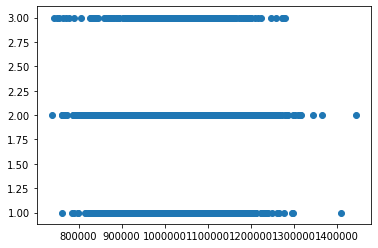


count    1347.000000
mean     3649.137342
std       748.720003
min      1558.000000
25%      3164.500000
50%      3683.000000
75%      4144.500000
max      5934.000000
Name: Entorhinal, dtype: float64


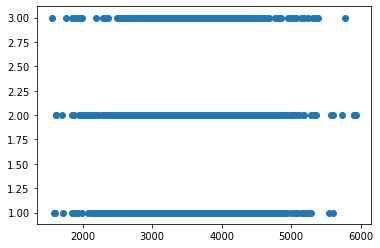


count     1347.000000
mean     17689.204157
std       2620.206333
min       9610.000000
25%      16016.500000
50%      17547.000000
75%      19278.000000
max      29950.000000
Name: Fusiform, dtype: float64


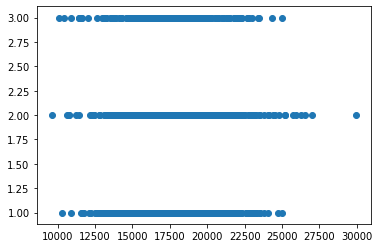


count     1347.000000
mean     19913.093541
std       2799.694062
min      10234.000000
25%      18075.500000
50%      19839.000000
75%      21882.000000
max      29292.000000
Name: MidTemp, dtype: float64


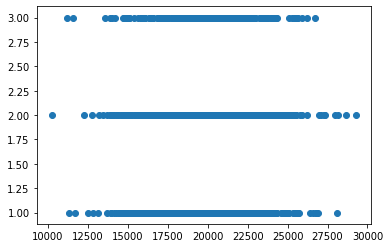


count    1.601000e+03
mean     1.537400e+06
std      1.629186e+05
min      7.161330e+05
25%      1.429400e+06
50%      1.525920e+06
75%      1.643370e+06
max      2.072470e+06
Name: ICV, dtype: float64


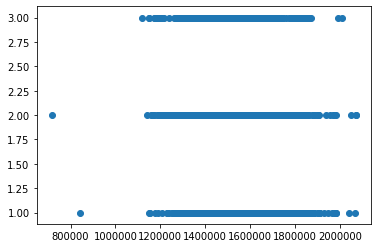

In [37]:
### Imaging tests
for col in imaging_vars :
    print(df3[col].describe())
    plt.scatter(df3[col], df3.DXCHANGE)
    plt.show()
    print()

count    801.000000
mean       1.267338
std        0.133671
min        0.782496
25%        1.183420
50%        1.265300
75%        1.348240
max        1.753320
Name: FDG, dtype: float64


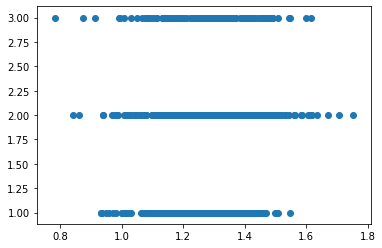


count    78.000000
mean      1.704679
std       0.455182
min       1.095000
25%       1.294375
50%       1.625000
75%       2.135625
max       2.637500
Name: PIB, dtype: float64


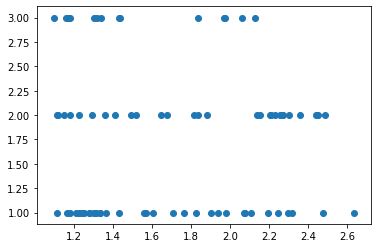


count    384.000000
mean       1.171001
std        0.205659
min        0.838537
25%        1.011335
50%        1.084595
75%        1.305417
max        1.856980
Name: AV45, dtype: float64


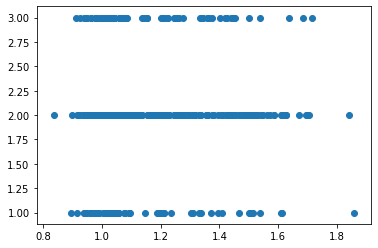

In [38]:
### Radio tracers
for col in radio_tracers :
    print(df3[col].describe())
    plt.scatter(df3[col], df3.DXCHANGE)
    plt.show()
    print()

The data distribution seems rather homogeneous for most of the variables. It will probably be difficult to classify accuratly the patients. In order to prevent synthetic datas to interfere with the model, we will remove the variables which have too many NaN values (MOCA, AV45, PIB).

In [39]:
df3 = clean_df(df3)
df3 = df3.drop(['MOCA', 'AV45'], axis = 1)

In [40]:
df3 = df3.fillna(df3.mean())

In [41]:
### Proportion of each diagnosis
print("CN :", len(df3[df3.DXCHANGE == 1])/len(df3))
print("MCI :", len(df3[df3.DXCHANGE == 2])/len(df3))
print("AD :", len(df3[df3.DXCHANGE == 3])/len(df3))

CN : 0.3652694610778443
MCI : 0.4562874251497006
AD : 0.1784431137724551


In [42]:
### Preparation of the datas
X = df3.drop(['DXCHANGE'], axis=1)
X = sk.preprocessing.StandardScaler().fit(X).transform(X)
Y = df3['DXCHANGE'].values

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

Like in the previous part, we will try the SVM model and a neural network. Each time, we will try to optimize the hyper-parameters.

SVM

In [43]:
SVM = svm.SVC()
param_grid_SVM = [{'C': [0.01, 0.1, 0.3, 1, 10], 'gamma': [0.001], 'kernel': ['linear', 'rbf', 'sigmoid']}]

gridSVM=GridSearchCV(SVM, param_grid=param_grid_SVM, cv=5)
gridSVM.fit(X_train,y_train)
print('Accuracy on training set :', gridSVM.best_score_)
SVM_params = gridSVM.best_params_
print('Best parameters :', gridSVM.best_params_, "\n")

# Train model with best parameters
SVM = svm.SVC(C = SVM_params['C'], gamma = SVM_params['gamma'], kernel = SVM_params['kernel'])
SVM.fit(X_train, y_train)
yhat_SVM = SVM.predict(X_test)
print("Accuracy on test set : ", SVM.score(X_test, y_test))
print (classification_report(y_test, yhat_SVM))

Accuracy on training set : 0.4790597573928112
Best parameters : {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} 

Accuracy on test set :  0.4491017964071856
              precision    recall  f1-score   support

         1.0       0.41      0.38      0.39       125
         2.0       0.47      0.66      0.55       155
         3.0       0.00      0.00      0.00        54

    accuracy                           0.45       334
   macro avg       0.29      0.35      0.31       334
weighted avg       0.37      0.45      0.40       334



C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
yhat_SVM

array([1., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
       2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1.,
       2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2.,
       1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 2.,
       1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2.,
       1., 2., 1., 2., 2.

The SVM model fails to classify the patients. Instead, the model predicts every patient having a CN or MCI diagnosis as shown above.

Consequently, we will try a neural network.

Neural network
We will fix the value of alpha to 1 and then test several architectures in order to find the netword that maximize the recall of the Alzheimer diagnosis (recall for DXCHANGE value 3.0).

In [45]:
X_train, X_cv, y_train, y_cv = train_test_split( X_train, y_train, test_size=0.2, random_state=4)

The first type of architecture is composed of 2-4 layers with the same number of neurons.

In [46]:
for ls in [8, 16, 32, 64] :
    # 2 layers
    clf = MLPClassifier(hidden_layer_sizes=(ls,ls), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 1000)
    clf.fit(X_train, y_train)
    print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))
    print (classification_report(y_cv, clf.predict(X_cv)))
    print()

    # 3 layers
    clf = MLPClassifier(hidden_layer_sizes=(ls,ls,ls), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 1000)
    clf.fit(X_train, y_train)
    print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))
    print (classification_report(y_cv, clf.predict(X_cv)))
    print()

    # 4 layers
    clf = MLPClassifier(hidden_layer_sizes=(ls,ls,ls,ls), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 800)
    clf.fit(X_train, y_train)
    print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ", ", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))
    print (classification_report(y_cv, clf.predict(X_cv)))
    print()

alpha =  1   ls = ( 8 ,  8 )  :   0.458955223880597
              precision    recall  f1-score   support

         1.0       0.41      0.46      0.43        97
         2.0       0.51      0.63      0.56       123
         3.0       0.14      0.02      0.04        48

    accuracy                           0.46       268
   macro avg       0.35      0.37      0.34       268
weighted avg       0.41      0.46      0.42       268


alpha =  1   ls = ( 8 ,  8 ,  8 )  :   0.39925373134328357
              precision    recall  f1-score   support

         1.0       0.37      0.44      0.40        97
         2.0       0.44      0.52      0.48       123
         3.0       0.00      0.00      0.00        48

    accuracy                           0.40       268
   macro avg       0.27      0.32      0.29       268
weighted avg       0.34      0.40      0.37       268


alpha =  1   ls = ( 8 ,  8 ,  8 ,  8 )  :   0.44029850746268656
              precision    recall  f1-score   support

      

The second type of architecture is composed of 2-4 layers with an increasing number of neurons.

In [47]:
for ls in [8, 16, 32, 64] :
    # 2 layers
    clf = MLPClassifier(hidden_layer_sizes=(ls,ls*2), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 1000)
    clf.fit(X_train, y_train)
    print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ")  :  ", clf.score(X_cv, y_cv))
    print (classification_report(y_cv, clf.predict(X_cv)))
    print()

    # 3 layers
    clf = MLPClassifier(hidden_layer_sizes=(int(ls/2),ls,ls*2), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 1000)
    clf.fit(X_train, y_train)
    print("alpha = ", alpha, "  ls = (", ls/2, ", ", ls, ", ", ls*2, ")  :  ", clf.score(X_cv, y_cv))
    print (classification_report(y_cv, clf.predict(X_cv)))
    print()

    # 4 layers
    clf = MLPClassifier(hidden_layer_sizes=(int(ls/2),ls,int(ls*1.5),ls*2), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 800)
    clf.fit(X_train, y_train)
    print("alpha = ", alpha, "  ls = (", ls/2, ", ", ls, ", ", ls*1.5, ", ", ls*2, ")  :  ", clf.score(X_cv, y_cv))
    print (classification_report(y_cv, clf.predict(X_cv)))
    print()

alpha =  1   ls = ( 8 ,  8 )  :   0.47761194029850745
              precision    recall  f1-score   support

         1.0       0.43      0.48      0.46        97
         2.0       0.53      0.63      0.58       123
         3.0       0.27      0.06      0.10        48

    accuracy                           0.48       268
   macro avg       0.41      0.39      0.38       268
weighted avg       0.45      0.48      0.45       268


alpha =  1   ls = ( 4.0 ,  8 ,  16 )  :   0.458955223880597
              precision    recall  f1-score   support

         1.0       0.41      0.45      0.43        97
         2.0       0.49      0.64      0.56       123
         3.0       0.00      0.00      0.00        48

    accuracy                           0.46       268
   macro avg       0.30      0.37      0.33       268
weighted avg       0.37      0.46      0.41       268




C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


alpha =  1   ls = ( 4.0 ,  8 ,  12.0 ,  16 )  :   0.48134328358208955
              precision    recall  f1-score   support

         1.0       0.43      0.49      0.46        97
         2.0       0.52      0.66      0.58       123
         3.0       0.00      0.00      0.00        48

    accuracy                           0.48       268
   macro avg       0.32      0.38      0.35       268
weighted avg       0.39      0.48      0.43       268




C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


alpha =  1   ls = ( 16 ,  16 )  :   0.43656716417910446
              precision    recall  f1-score   support

         1.0       0.44      0.46      0.45        97
         2.0       0.48      0.56      0.51       123
         3.0       0.15      0.06      0.09        48

    accuracy                           0.44       268
   macro avg       0.35      0.36      0.35       268
weighted avg       0.40      0.44      0.42       268


alpha =  1   ls = ( 8.0 ,  16 ,  32 )  :   0.4626865671641791
              precision    recall  f1-score   support

         1.0       0.41      0.54      0.46        97
         2.0       0.53      0.57      0.55       123
         3.0       0.22      0.04      0.07        48

    accuracy                           0.46       268
   macro avg       0.39      0.38      0.36       268
weighted avg       0.43      0.46      0.43       268


alpha =  1   ls = ( 8.0 ,  16 ,  24.0 ,  32 )  :   0.4626865671641791
              precision    recall  f1-score   su

C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


alpha =  1   ls = ( 32 ,  32 )  :   0.41044776119402987
              precision    recall  f1-score   support

         1.0       0.40      0.49      0.44        97
         2.0       0.49      0.47      0.48       123
         3.0       0.14      0.08      0.10        48

    accuracy                           0.41       268
   macro avg       0.34      0.35      0.34       268
weighted avg       0.39      0.41      0.40       268


alpha =  1   ls = ( 16.0 ,  32 ,  64 )  :   0.44402985074626866
              precision    recall  f1-score   support

         1.0       0.39      0.47      0.43        97
         2.0       0.51      0.57      0.54       123
         3.0       0.25      0.06      0.10        48

    accuracy                           0.44       268
   macro avg       0.38      0.37      0.35       268
weighted avg       0.42      0.44      0.42       268


alpha =  1   ls = ( 16.0 ,  32 ,  48.0 ,  64 )  :   0.4626865671641791
              precision    recall  f1-score  

A network with 4 layers (16,32,48,64) seems to be the best one for accuracy and the targeted objective.

In [48]:
alpha = 1
ls = 32
clf = MLPClassifier(hidden_layer_sizes=(int(ls/2), ls, int(ls*1.5), ls*2), activation='tanh', solver='adam',
                            alpha=alpha, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("alpha = ", alpha, "  ls = (", int(ls/2), ", ", ls, ", ", int(ls*2), ")  ", "Accuracy :", clf.score(X_test, y_test))
print (classification_report(y_test, clf.predict(X_test)))

alpha =  1   ls = ( 16 ,  32 ,  64 )   Accuracy : 0.4221556886227545
              precision    recall  f1-score   support

         1.0       0.38      0.38      0.38       125
         2.0       0.47      0.55      0.50       155
         3.0       0.30      0.15      0.20        54

    accuracy                           0.42       334
   macro avg       0.38      0.36      0.36       334
weighted avg       0.41      0.42      0.41       334



The purpose of the model is, of course, to have the best possible accuracy but also to maximize the recall of the Alzheimer diagnosis. After, trying lots of architectures, a 4 layers network with a growing number of neurons seem to be the most accurate one. While the network achieves a 42,21% accuracy, it is however not as good to predict Alzheimer disease. Indeed, the model is only able to identify 15% of the patients that have Alzheimer.

# Part 4: AD versus CN versus MCI in 3 years, with longitudinal data

This part is relatively similar to the precedent, except that instead of using only one visit in the past to predict the diagnosis in 3 years, you are welcome to used longitudinal measurements per individual, therefore use all the past visits of the individual to predict the diagnosis outcome in 3 years.

NB: You can reproduce the experiments by choosing other temporal horizons such as 2, 4 or 5 years.

For this part, we have to first select patients that had been multiple times to the doctor through at least 4 years.

In [49]:
### Find every patients that went to the doctor on 3 occasions
# (bl, m06, m12) before the prediction time
m48 = df[df.VISCODE == 'm48']
rid = m48['RID'].to_numpy()

for i in ['m12', 'm06', 'bl'] :
    temp = df[df.VISCODE == i]
    rid = np.intersect1d(rid, temp['RID'].to_numpy())

Now, we can remove all the patients that don't belong to this list from the original dataset and replace the DXCHANGE value of the remaining patients by their DXCHANGE value at m48 time.

In [50]:
df4 = df[df.VISCODE == 'bl']
df4 = df4[['RID'] + selected_vars]
df4 = df4[df4['RID'].isin(rid)]
df4 = df4.set_index('RID')

In [51]:
m48 = m48[m48['RID'].isin(rid)]
m48 = m48.set_index('RID')
df4['DXCHANGE'] = m48['DXCHANGE'].to_numpy()

Dataset is then cleaned in a similar way than in the previous parts.

In [52]:
df4 = df4.drop(['PTETHCAT', 'PTRACCAT'], axis=1)
df4['PTEDUCAT'] = df4['PTEDUCAT'].apply(lambda x: 11 if x<12 else x)
df4['PTMARRY'] = df4['PTMARRY'].replace(to_replace=['Divorced','Married', 'Never married', 'Widowed'], value=[0,1,0,0])
df4 = df4[df4.PTMARRY != 'Unknown']
df4 = df4.drop(['PIB'], axis=1)
df4 = df4.fillna(df4.mean())

Datasets corresponding to the m06 and m12 time are prepared in the same way.

In [53]:
def prepare_df(init_df, date, rid) :
    df = init_df[init_df.VISCODE == date]
    df = df[df['RID'].isin(rid)]
    df = df.set_index('RID')
    df = df[df.PTMARRY != 'Unknown']
    df = df.drop(['PIB','VISCODE','PTMARRY'], axis=1)
    df.columns = [name + '_' + date for name in df.columns]
    df = df.fillna(df.mean())
    return df

In [54]:
temp_df = df[['RID', 'VISCODE', 'PTMARRY'] + cognitive_tests + imaging_vars + radio_tracers]
df_m06 = prepare_df(temp_df, 'm06', rid)
df_m12 = prepare_df(temp_df, 'm12', rid)

The three datasets are concatenated which means that the columns of df_m06 and df_m12 are added to df4. Consequently, for each patient in our list, we now have, in the datasat df4, the results of their tests and their personnal informations at several time (bl, m06 and m12) as well as their final diagnosis at m48.

In [55]:
df4 = pd.concat([df4, df_m06, df_m12], sort=False, axis = 1)

We can now check for missing values and remove them.

In [56]:
for col in df4.columns :
    if df4[col].isnull().values.any() :
        print(col)

AV45_m06


In [57]:
df_m06['AV45_m06'].value_counts()

Series([], Name: AV45_m06, dtype: int64)

In [58]:
df4 = df4.drop(['AV45_m06'], axis = 1)

In [59]:
### Preparation of the datas
X = df4.drop(['DXCHANGE'], axis=1)
X = sk.preprocessing.StandardScaler().fit(X).transform(X)
Y = df4['DXCHANGE'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

We will try the same network than in part 3.

In [62]:
ls = 32
clf = MLPClassifier(hidden_layer_sizes=(int(ls/2),ls,int(ls*1.5),ls*2), activation='tanh', solver='adam',
                            alpha=1, random_state=1, max_iter = 1000)
clf.fit(X_train, y_train)
print("Accuracy on training set : ", clf.score(X_train, y_train))
print("Accuracy on test set : ", clf.score(X_test, y_test))
print()
print (classification_report(y_test, clf.predict(X_test)))

Accuracy on training set :  1.0
Accuracy on test set :  0.4536082474226804

              precision    recall  f1-score   support

         1.0       0.38      0.39      0.39        38
         2.0       0.58      0.58      0.58        45
         3.0       0.23      0.21      0.22        14

    accuracy                           0.45        97
   macro avg       0.40      0.40      0.40        97
weighted avg       0.45      0.45      0.45        97



The results are a little bit better than in part 3. The training set is in fact very imbalanced and it may be the reason of this bad result.
Consequently, we will try a data rebalancing technique.

In [63]:
print("CN :", np.sum(y_train == 1))
print("CMI :", np.sum(y_train == 2))
print("AD :", np.sum(y_train == 3))

CN : 163
CMI : 173
AD : 52


In [70]:
### Preparation of the datas
X = df4.drop(['DXCHANGE'], axis=1)
X = sk.preprocessing.StandardScaler().fit(X).transform(X)
Y = df4['DXCHANGE'].values

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [71]:
import imblearn as imb

In [72]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(ratio='minority')
X_train_re, y_train_re = adasyn.fit_sample(X_train, y_train)

C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [73]:
print("CN :", np.sum(y_train_re == 1))
print("CMI :", np.sum(y_train_re == 2))
print("AD :", np.sum(y_train_re == 3))

CN : 163
CMI : 173
AD : 188


There are now way more AD examples in our training set.

In [74]:
for ls in [8, 16, 32, 64, 128] :
    # 2 layers
    clf = MLPClassifier(hidden_layer_sizes=(ls,ls*2), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 1000)
    clf.fit(X_train_re, y_train_re)
    print("alpha = ", alpha, "  ls = (", ls, ", ", ls, ")  :  ", clf.score(X_test, y_test))
    print (classification_report(y_test, clf.predict(X_test)))
    print()

    # 3 layers
    clf = MLPClassifier(hidden_layer_sizes=(int(ls/2),ls,ls*2), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 1000)
    clf.fit(X_train_re, y_train_re)
    print("alpha = ", alpha, "  ls = (", ls/2, ", ", ls, ", ", ls*2, ")  :  ", clf.score(X_test, y_test))
    print (classification_report(y_test, clf.predict(X_test)))
    print()

    # 4 layers
    clf = MLPClassifier(hidden_layer_sizes=(int(ls/2),ls,int(ls*1.5),ls*2), activation='tanh', solver='adam',
                        alpha=alpha, random_state=1, max_iter = 800)
    clf.fit(X_train_re, y_train_re)
    print("alpha = ", alpha, "  ls = (", ls/2, ", ", ls, ", ", ls*1.5, ", ", ls*2, ")  :  ", clf.score(X_test, y_test))
    print (classification_report(y_test, clf.predict(X_test)))
    print()

alpha =  1   ls = ( 8 ,  8 )  :   0.4536082474226804
              precision    recall  f1-score   support

         1.0       0.39      0.37      0.38        38
         2.0       0.62      0.58      0.60        45
         3.0       0.21      0.29      0.24        14

    accuracy                           0.45        97
   macro avg       0.41      0.41      0.41        97
weighted avg       0.47      0.45      0.46        97




C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  1   ls = ( 4.0 ,  8 ,  16 )  :   0.4639175257731959
              precision    recall  f1-score   support

         1.0       0.64      0.37      0.47        38
         2.0       0.56      0.51      0.53        45
         3.0       0.24      0.57      0.33        14

    accuracy                           0.46        97
   macro avg       0.48      0.48      0.44        97
weighted avg       0.54      0.46      0.48        97




C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  1   ls = ( 4.0 ,  8 ,  12.0 ,  16 )  :   0.3917525773195876
              precision    recall  f1-score   support

         1.0       0.37      0.26      0.31        38
         2.0       0.52      0.53      0.53        45
         3.0       0.17      0.29      0.21        14

    accuracy                           0.39        97
   macro avg       0.35      0.36      0.35        97
weighted avg       0.41      0.39      0.40        97


alpha =  1   ls = ( 16 ,  16 )  :   0.4329896907216495
              precision    recall  f1-score   support

         1.0       0.40      0.37      0.38        38
         2.0       0.56      0.51      0.53        45
         3.0       0.24      0.36      0.29        14

    accuracy                           0.43        97
   macro avg       0.40      0.41      0.40        97
weighted avg       0.45      0.43      0.44        97


alpha =  1   ls = ( 8.0 ,  16 ,  32 )  :   0.4020618556701031
              precision    recall  f1-score   supp

C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  1   ls = ( 8.0 ,  16 ,  24.0 ,  32 )  :   0.4020618556701031
              precision    recall  f1-score   support

         1.0       0.36      0.26      0.30        38
         2.0       0.51      0.51      0.51        45
         3.0       0.25      0.43      0.32        14

    accuracy                           0.40        97
   macro avg       0.37      0.40      0.38        97
weighted avg       0.41      0.40      0.40        97


alpha =  1   ls = ( 32 ,  32 )  :   0.44329896907216493
              precision    recall  f1-score   support

         1.0       0.40      0.37      0.38        38
         2.0       0.57      0.53      0.55        45
         3.0       0.25      0.36      0.29        14

    accuracy                           0.44        97
   macro avg       0.41      0.42      0.41        97
weighted avg       0.46      0.44      0.45        97


alpha =  1   ls = ( 16.0 ,  32 ,  64 )  :   0.4020618556701031
              precision    recall  f1-score   s

C:\Users\Geoffrey\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha =  1   ls = ( 16.0 ,  32 ,  48.0 ,  64 )  :   0.422680412371134
              precision    recall  f1-score   support

         1.0       0.32      0.29      0.31        38
         2.0       0.56      0.56      0.56        45
         3.0       0.28      0.36      0.31        14

    accuracy                           0.42        97
   macro avg       0.39      0.40      0.39        97
weighted avg       0.42      0.42      0.42        97


alpha =  1   ls = ( 64 ,  64 )  :   0.4742268041237113
              precision    recall  f1-score   support

         1.0       0.47      0.47      0.47        38
         2.0       0.57      0.51      0.54        45
         3.0       0.26      0.36      0.30        14

    accuracy                           0.47        97
   macro avg       0.44      0.45      0.44        97
weighted avg       0.49      0.47      0.48        97


alpha =  1   ls = ( 32.0 ,  64 ,  128 )  :   0.4329896907216495
              precision    recall  f1-score   s

One of the network that maximizes our targets is a 4-layers (16,32,48,64) network.

In [69]:
clf = MLPClassifier(hidden_layer_sizes=(16,32,48,64), activation='tanh', solver='adam',
                            alpha=1, random_state=1, max_iter = 1000)
clf.fit(X_train_re, y_train_re)
print("Accuracy on test set : ", clf.score(X_test, y_test))
print()
print (classification_report(y_test, clf.predict(X_test)))

Accuracy on test set :  0.4536082474226804

              precision    recall  f1-score   support

         1.0       0.44      0.47      0.46        38
         2.0       0.62      0.51      0.56        45
         3.0       0.16      0.21      0.18        14

    accuracy                           0.45        97
   macro avg       0.41      0.40      0.40        97
weighted avg       0.48      0.45      0.47        97



Thanks to the synthetic datas, with the same architecture network, a better result was achieved on the test set but it's not always the case. Unfortunately, this is very dependent to the composition of the training set and the test set as well as the new datas generated. Sometimes, the network is more accurate and sometimes it's not. We can still conclude that taking into account the past of the patient may improve the accuracy of the diagnosis (results are way better than in part 3).

Even if it's not in the notebook, the test set accuracy was often way lower than the training set accuracy of the several neural networks used. Most of the time, the number of patients was rather low, between 500 and 800. So maybe, increasing the number of samples in the dataset would help to have a better accuracy. 